In [1]:
import pandas as pd

# Asegúrate de ajustar la ruta del archivo a tu ubicación local
data_path = 'C:/Users/Matias Davila/OneDrive - DISTRIBUIDORA Y COMERCIALIZADORA OPEN/Documentos/Matias/Analisis multivariante/Labour.csv'
data = pd.read_csv(data_path)
data.head()

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709


In [11]:
missing_values = data.isnull().sum()
print(missing_values)

capital    0
labour     0
output     0
wage       0
dtype: int64


In [12]:
# Calcular el vector medio para cada columna
vector_medio = data.mean()
print(vector_medio)


capital     11.515447
labour     201.080844
output      14.719225
wage        38.632877
dtype: float64


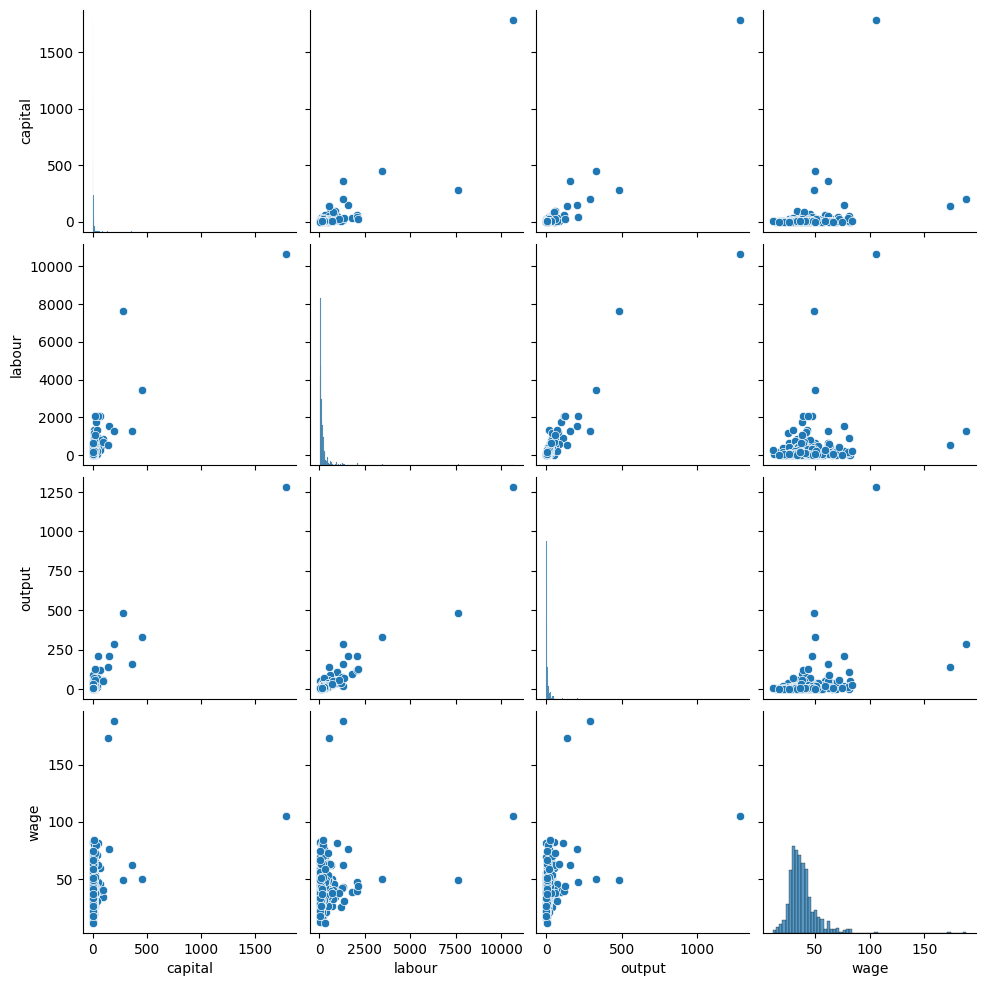

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una matriz de diagrama de dispersión para las variables
sns.pairplot(data)
plt.show()


In [14]:
# Calcular la matriz de datos centrada
data_centered = data - data.mean()

# Calcular la matriz de varianza-covarianza
cov_matrix = data.cov()

# Calcular la matriz de correlación
corr_matrix = data.corr()

print("Matriz de Datos Centrada:\n", data_centered.head())
print("\nMatriz de Varianza-Covarianza:\n", cov_matrix)
print("\nMatriz de Correlación:\n", corr_matrix)


Matriz de Datos Centrada:
      capital      labour     output       wage
0  -8.908884  -17.080844  -5.468466   4.447430
1 -10.192210 -110.080844 -11.054915 -10.852861
2  10.578245  224.919156  14.062291   5.834871
3  -0.777596 -129.080844 -10.594583   1.101832
4 -10.354083 -155.080844 -11.829076  -3.982168

Matriz de Varianza-Covarianza:
               capital         labour        output         wage
capital   6483.284920   41811.034184   4803.858207   357.342220
labour   41811.034184  374539.000495  36210.274748  2294.604205
output    4803.858207   36210.274748   3934.988195   346.833056
wage       357.342220    2294.604205    346.833056   208.607360

Matriz de Correlación:
           capital    labour    output      wage
capital  1.000000  0.848486  0.951088  0.307271
labour   0.848486  1.000000  0.943217  0.259594
output   0.951088  0.943217  1.000000  0.382811
wage     0.307271  0.259594  0.382811  1.000000


In [15]:
from sklearn.preprocessing import StandardScaler

# Estandarizar las variables
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)
data_standardized = pd.DataFrame(data_standardized, columns=data.columns)

print(data_standardized.head())


    capital    labour    output      wage
0 -0.110741 -0.027935 -0.087252  0.308195
1 -0.126693 -0.180030 -0.176387 -0.752075
2  0.131492  0.367841  0.224371  0.404342
3 -0.009666 -0.211103 -0.169042  0.076354
4 -0.128705 -0.253625 -0.188739 -0.275954


In [16]:
# Calcular la matriz de varianza-covarianza de los datos estandarizados
cov_matrix_standardized = pd.DataFrame(data_standardized).cov()
print(cov_matrix_standardized)


          capital    labour    output      wage
capital  1.001761  0.849980  0.952763  0.307812
labour   0.849980  1.001761  0.944878  0.260051
output   0.952763  0.944878  1.001761  0.383485
wage     0.307812  0.260051  0.383485  1.001761


In [17]:
from scipy.spatial.distance import pdist, squareform

# Calcular la matriz de distancias euclidianas
distances = pdist(data_standardized, metric='euclidean')
distance_matrix = squareform(distances)

print(distance_matrix)


[[0.         1.07494508 0.56715747 ... 0.17943411 1.65387059 0.45106948]
 [1.07494508 0.         1.36555066 ... 0.92870043 2.70030072 0.62537893]
 [0.56715747 1.36555066 0.         ... 0.70719042 1.71515548 0.81485117]
 ...
 [0.17943411 0.92870043 0.70719042 ... 0.         1.77568554 0.32274343]
 [1.65387059 2.70030072 1.71515548 ... 1.77568554 0.         2.09459011]
 [0.45106948 0.62537893 0.81485117 ... 0.32274343 2.09459011 0.        ]]


In [18]:
import numpy as np

# Aplicar descomposición de valores singulares
U, S, Vt = np.linalg.svd(data_centered, full_matrices=False)

# Crear una aproximación de rango 3
S_r3 = np.diag(S[:3])
data_approx_r3 = np.dot(U[:, :3], S_r3)

print(data_approx_r3)


[[-1.83830474e+01 -7.50311839e+00 -4.13801690e+00]
 [-1.11145647e+02  1.08426295e+00  9.54718116e+00]
 [ 2.25037792e+02 -1.60432966e+01 -4.35595372e+00]
 ...
 [-8.50286243e+01 -1.03863000e-02 -2.53289047e+00]
 [-1.55012412e+02  1.18988902e+01 -2.68308449e+01]
 [-4.13825686e+01 -5.50404768e+00  2.16243396e+00]]


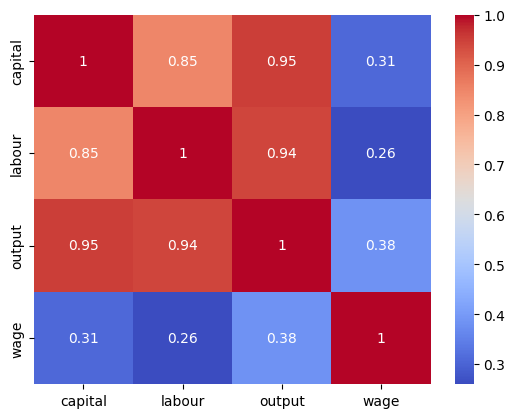

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Para usar corrplot, necesitarías instalar el paquete corrplot con pip
# pip install corrplot


In [2]:
# Crear una variable dicotómica basada en la mediana de 'labour'
mediana_labour = data['labour'].median()
data['categoria'] = (data['labour'] > mediana_labour).astype(int)  # 1 si es mayor que la mediana, 0 si es menor

# Separar la variable dicotómica
categoria = data['categoria']
data = data.drop('categoria', axis=1)

print(data.head())
print(categoria.head())


     capital  labour     output       wage
0   2.606563     184   9.250759  43.080307
1   1.323237      91   3.664310  27.780016
2  22.093692     426  28.781516  44.467748
3  10.737851      72   4.124642  39.734710
4   1.161365      46   2.890150  34.650709
0    1
1    1
2    1
3    0
4    0
Name: categoria, dtype: int32


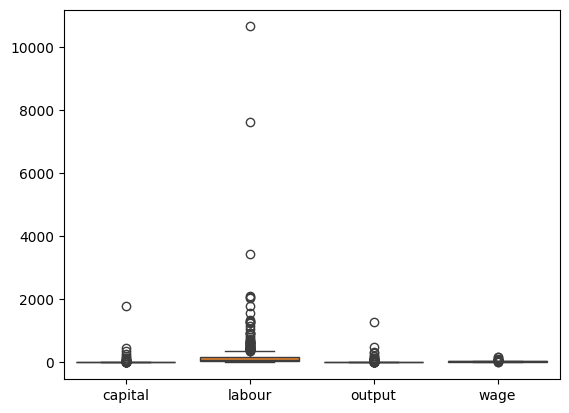

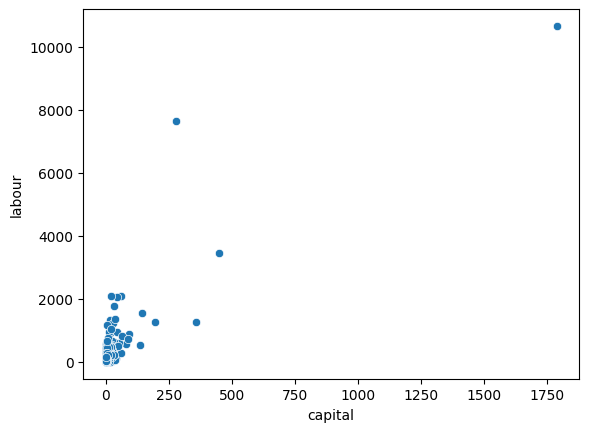

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagramas de caja para cada variable
sns.boxplot(data=data)
plt.show()

# Diagrama de dispersión (elige dos variables para comparar)
sns.scatterplot(x='capital', y='labour', data=data)
plt.show()



In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Estandarizar las variables
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Convertir de nuevo a DataFrame para facilitar la manipulación
data_standardized = pd.DataFrame(data_standardized, columns=data.columns)


# Realizar PCA
pca = PCA()
pca.fit(data_standardized)

# Varianza explicada por cada componente
print(pca.explained_variance_ratio_)


[0.74547005 0.21370427 0.03751016 0.00331552]


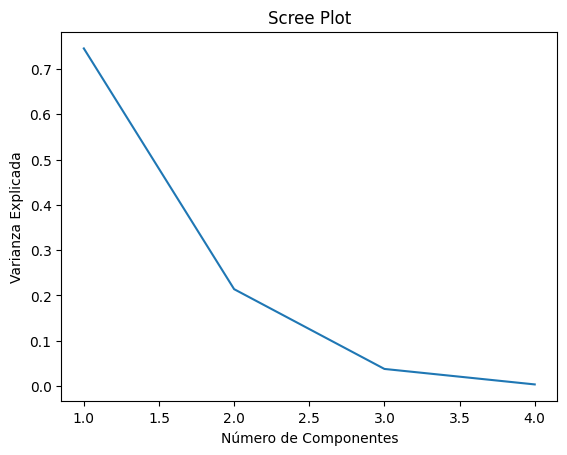

In [8]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.title('Scree Plot')
plt.show()


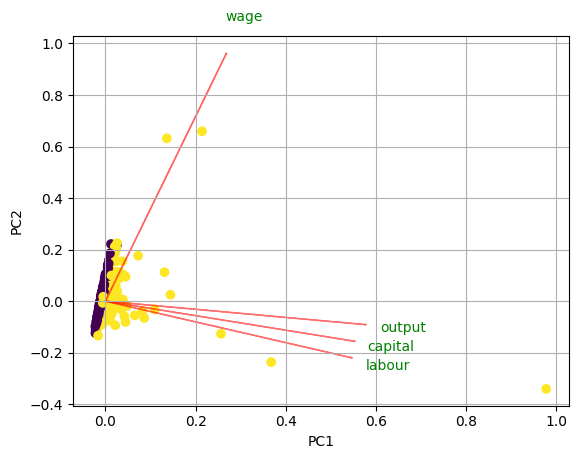

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def biplot(score, coeff, labels=None, categories=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=categories)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color='r',alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Asumiendo que tienes un objeto PCA llamado 'pca' y tus datos estandarizados llamados 'data_standardized'
scores = pca.transform(data_standardized)
biplot(scores[:,0:2], np.transpose(pca.components_[0:2, :]), labels=data.columns, categories=categoria)
plt.show()


In [10]:
# Componentes principales
components = pca.components_

# Correlaciones entre componentes
correlations = np.corrcoef(components)
print(correlations)


[[ 1.00000000e+00 -9.83424202e-01 -6.13634845e-02  1.58750622e-01]
 [-9.83424202e-01  1.00000000e+00 -4.05870024e-03  1.05000750e-02]
 [-6.13634845e-02 -4.05870024e-03  1.00000000e+00  6.55181342e-04]
 [ 1.58750622e-01  1.05000750e-02  6.55181342e-04  1.00000000e+00]]


In [11]:
# Calcular scores
scores = pca.transform(data_standardized)

# Calcular varianzas de las scores
variances = np.var(scores, axis=0)
print(variances)


[2.98188021 0.8548171  0.15004062 0.01326207]


In [12]:
# Loadings del PCA
loadings = pca.components_.T
print(loadings)


[[ 0.5500371  -0.15498236 -0.70714165 -0.41640166]
 [ 0.5439335  -0.21898046  0.70549109 -0.39807817]
 [ 0.57449466 -0.09082858 -0.01218293  0.81336193]
 [ 0.26749097  0.95905067  0.04565736 -0.0811529 ]]


In [13]:
# Calcular la matriz de correlación
correlation_matrix = np.corrcoef(data_standardized.T, scores.T)[:len(data.columns), len(data.columns):]
print(correlation_matrix)


[[ 0.94981075 -0.14329099 -0.27391186 -0.04795326]
 [ 0.93927098 -0.20246127  0.27327252 -0.04584311]
 [ 0.99204436 -0.08397677 -0.00471907  0.09366763]
 [ 0.46190665  0.88670295  0.01768541 -0.00934565]]
